In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

In [2]:
sns.set_style('darkgrid')

In [3]:
df = load_digits()

(1797, 64)


<Figure size 432x288 with 0 Axes>

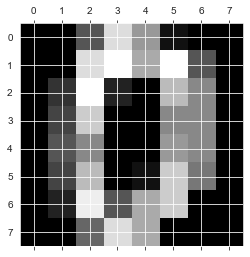

In [4]:
df = load_digits()
print(df.data.shape)
(1797, 64)
plt.gray()
plt.matshow(df.images[0])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size = 0.3)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()

In [10]:
lr.fit(x_train, y_train)

C:\Users\w-ZONE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
lr.score(x_test, y_test)

0.9648148148148148

## SVM

In [12]:
from sklearn.svm import SVC

In [13]:
sv = SVC()

In [14]:
sv.fit(x_train, y_train)

SVC()

In [15]:
sv.score(x_test, y_test)

0.9851851851851852

### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier()

In [18]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
rfc.score(x_test, y_test)

0.9629629629629629

### K fold validation

In [20]:
def get_score(model, x_train, x_test, y_train, y_test) :
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [21]:
from sklearn.model_selection import KFold

In [22]:
fold = KFold(n_splits=3)

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
score_lr = []
score_svc = []
score_rfc = []

for train_index, test_index in fold.split(df.data, df.target):
    x_train, x_test, y_train, y_test = df.data[train_index], df.data[test_index], df.target[train_index], df.target[test_index]
    score_lr.append(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    score_svc.append(get_score(SVC(), x_train, x_test, y_train, y_test))
    score_rfc.append(get_score(RandomForestClassifier(n_estimators=50), x_train, x_test, y_train, y_test))

print(score_lr)
print(score_svc)
print(score_rfc)

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]
[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]
[0.9465776293823038, 0.9549248747913188, 0.9232053422370617]


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(LogisticRegression(), df.data, df.target, cv = 3)

array([0.92153589, 0.94156928, 0.91652755])

In [27]:
cross_val_score(SVC(), df.data, df.target, cv = 3)

array([0.96494157, 0.97996661, 0.96494157])

In [28]:
cross_val_score(RandomForestClassifier(), df.data, df.target, cv = 3)

array([0.93489149, 0.95492487, 0.92988314])

In [29]:
from sklearn.model_selection import StratifiedKFold
s_fold = StratifiedKFold(n_splits=3)

In [30]:
score_lr = []
score_svc = []
score_rfc = []

for train_index, test_index in s_fold.split(df.data, df.target):
    x_train, x_test, y_train, y_test = df.data[train_index], df.data[test_index], df.target[train_index], df.target[test_index]
    score_lr.append(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    score_svc.append(get_score(SVC(), x_train, x_test, y_train, y_test))
    score_rfc.append(get_score(RandomForestClassifier(n_estimators=50), x_train, x_test, y_train, y_test))

print(score_lr)
print(score_svc)
print(score_rfc)

[0.9215358931552587, 0.9415692821368948, 0.9165275459098498]
[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]
[0.9265442404006677, 0.9549248747913188, 0.9282136894824707]


In [32]:
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [33]:
score1 = cross_val_score(RandomForestClassifier(n_estimators = 5),df.data, df.target, cv = 10 )

In [34]:
score1

array([0.8       , 0.91666667, 0.86666667, 0.84444444, 0.89444444,
       0.92222222, 0.91666667, 0.91061453, 0.87150838, 0.84916201])

In [35]:
np.average(score1)

0.8792396027312229

In [36]:
score2 = cross_val_score(RandomForestClassifier(n_estimators = 15),df.data, df.target, cv = 10 )
score3 = cross_val_score(RandomForestClassifier(n_estimators = 25),df.data, df.target, cv = 10 )
score4 = cross_val_score(RandomForestClassifier(n_estimators = 35),df.data, df.target, cv = 10 )
score5 = cross_val_score(RandomForestClassifier(n_estimators = 45),df.data, df.target, cv = 10 )

In [37]:
np.average(score2)

0.9237740533829918

In [38]:
np.average(score3)

0.9304345127250155

In [39]:
np.average(score4)

0.9449037864680321

In [40]:
np.average(score5)

0.9493575418994412

In [46]:
score6 = cross_val_score(RandomForestClassifier(n_estimators = 80),df.data, df.target, cv = 10 )
np.average(score6)

0.951582867783985